                   **Exploratory Data Analysis of the Heart Failure Clinical Data**

In [2]:
#import the required libraries 

# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Altair' is a data visualization library for 2D and 3D plots
import altair as alt

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from collections import defaultdict
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# pip install seaborn


## **Understanding the Data**

> **Column Description**

1. **Age**: Age of the patient
2. **Anaemia**: Decrease of red blood cells or hemoglobin.
3. **High blood pressure**: If a patient has hypertension.
4. **Creatinine phosphokinase**: Level of the CPK enzyme in the blood.
5. **Diabetes**:If the patient has diabetes.
6. **Ejection fraction**: Percentage of blood leaving the heart at each contraction.
7. **Sex**: Woman(0) or man(1).
8. **Platelets**: Platelets in the blood.
9. **Serum creatinine**: Level of creatinine in the blood.
10. **Serum sodium**: Level of sodium in the blood.
11. **Smoking**: If the patient smokes.
12. **Time**: Follow-up period.
13. **(target) death event**: If the patient died during the follow-up period.


In [4]:
# Load data
df = pd.read_csv('../data/raw/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
df.shape

(299, 13)

There are 299 records and 13 features in the dataset.

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**Even though we see only the numeric data types in the above cell, our data has some binary features and some numeric features**

In [8]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

** This indicates that there are no missing values in the dataset**

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
#Check for duplicated rows
df.duplicated().sum()

0

** There are no duplicate records in the dataset **

**Distribution of the target variable DEATH_EVENT**

In [12]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

Text(0.5, 0, 'Death Event')

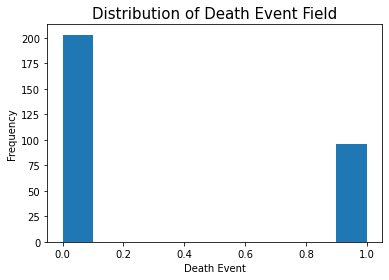

In [13]:
plt.title("Distribution of Death Event Field", size=15)
df['DEATH_EVENT'].plot(kind = 'hist')
plt.xlabel('Death Event')

In [14]:
print(df['anaemia'].nunique())
print(df['diabetes'].nunique())
print(df['high_blood_pressure'].nunique())
print(df['sex'].nunique())
print(df['smoking'].nunique())

2
2
2
2
2


All these variables are binary variables.

**Split the data**

In [15]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [16]:
train_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
236,75.0,0,119,0,50,1,248000.00,1.10,148,1,0,209,0
102,80.0,0,898,0,25,0,149000.00,1.10,144,1,1,87,0
196,45.0,0,582,1,38,1,263358.03,1.18,137,0,0,185,0
53,70.0,1,69,1,50,1,351000.00,1.00,134,0,0,44,1
105,72.0,1,328,0,30,1,621000.00,1.70,138,0,1,88,1


**Summary Statistics of training data**

In [16]:
train_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,209.000000,209.000000,209.00000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,60.003191,0.425837,583.22488,0.392344,38.258373,0.363636,265832.949809,1.393589,136.540670,0.641148,0.325359,129.545455,0.282297
std,11.738014,0.495657,992.57029,0.489445,11.990390,0.482201,101526.399271,1.108673,4.416917,0.480815,0.469634,77.378621,0.451198
min,40.000000,0.000000,47.00000,0.000000,14.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,122.00000,0.000000,30.000000,0.000000,212000.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.00000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,112.000000,0.000000
75%,68.000000,1.000000,582.00000,1.000000,45.000000,1.000000,304000.000000,1.300000,139.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.00000,1.000000,80.000000,1.000000,850000.000000,9.400000,145.000000,1.000000,1.000000,285.000000,1.000000


In [17]:
train_df['DEATH_EVENT'].value_counts()

0    150
1     59
Name: DEATH_EVENT, dtype: int64

In [18]:
corrMatrix = train_df.corr()
print(corrMatrix)

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.151538                 -0.120675   
anaemia                   0.151538  1.000000                 -0.153659   
creatinine_phosphokinase -0.120675 -0.153659                  1.000000   
diabetes                 -0.133554  0.001612                 -0.019500   
ejection_fraction         0.064635  0.046114                 -0.064591   
high_blood_pressure       0.050475  0.032916                 -0.017941   
platelets                -0.072073 -0.088283                  0.006734   
serum_creatinine          0.157094  0.116628                 -0.092847   
serum_sodium             -0.074774  0.116126                  0.045689   
sex                       0.074599 -0.122295                  0.101564   
smoking                   0.008532 -0.123032                 -0.027768   
time                     -0.159812 -0.128305                 -0.029608   
DEATH_EVENT               0.203169  0.

In [19]:
corr_df = train_df.select_dtypes('number').corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
corr_df['abs'] = corr_df['corr'].abs()
corr_df

,level_0,level_1,corr,abs
0,age,age,0.000000,0.000000
1,age,anaemia,0.137266,0.137266
2,age,creatinine_phosphokinase,-0.107235,0.107235
3,age,diabetes,-0.110279,0.110279
4,age,ejection_fraction,0.080234,0.080234
...,...,...,...,...
164,DEATH_EVENT,serum_sodium,-0.147697,0.147697
165,DEATH_EVENT,sex,0.003817,0.003817
166,DEATH_EVENT,smoking,-0.072517,0.072517
167,DEATH_EVENT,time,-0.559535,0.559535


**Pairwise Correlation Plots**

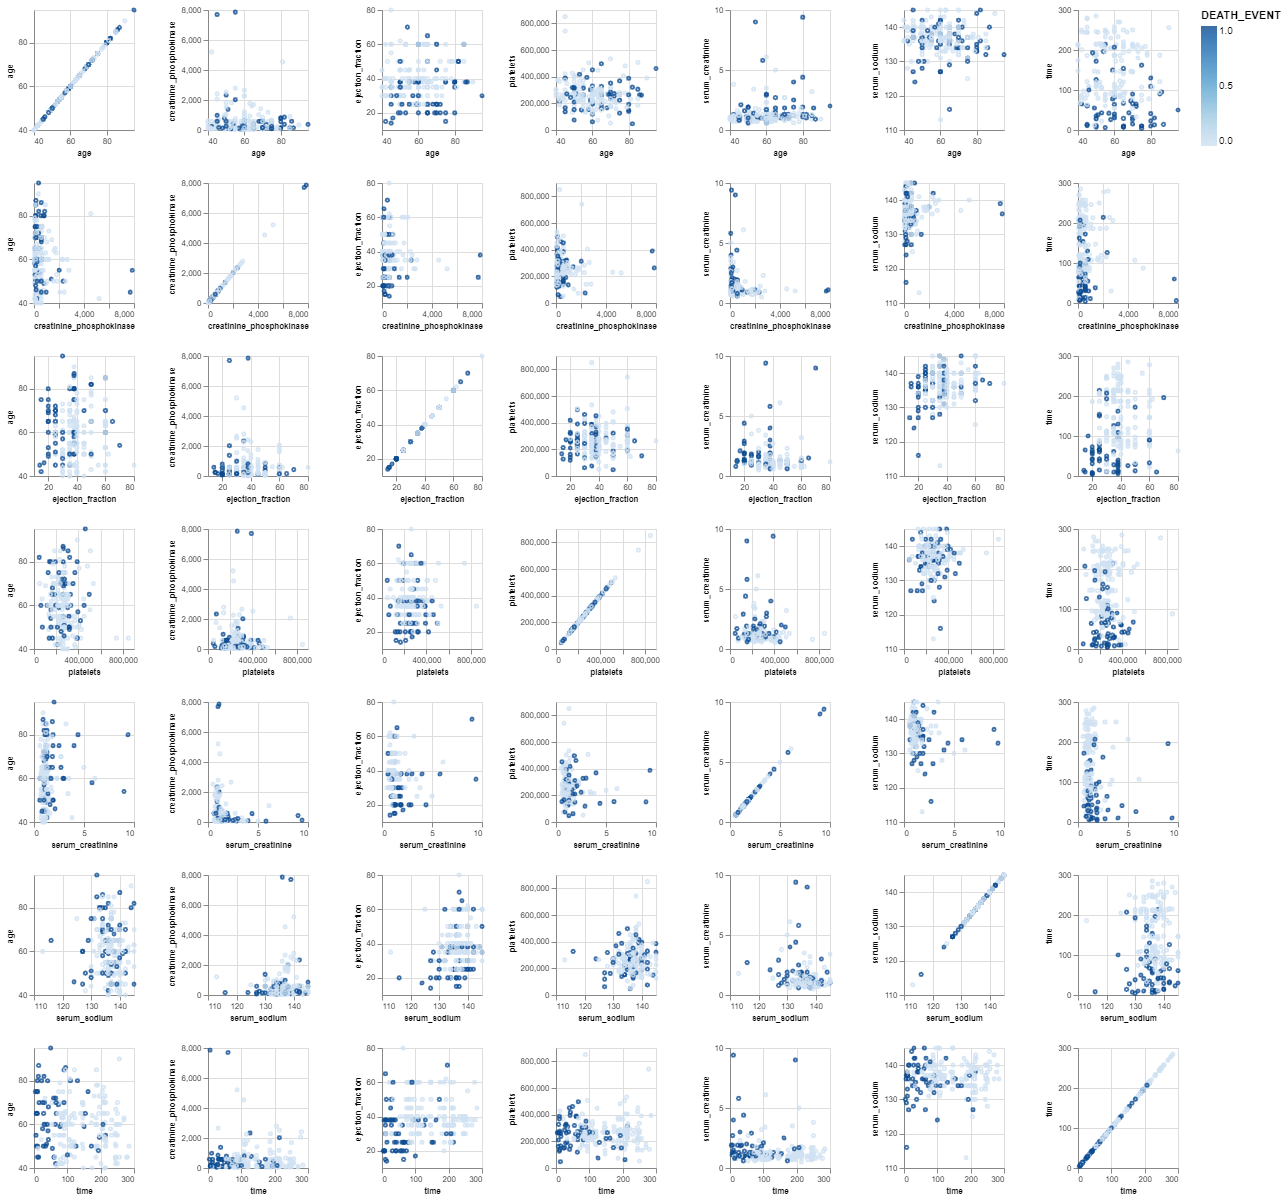

In [20]:
numeric_cols=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']
pair = alt.Chart(train_df).mark_point(opacity=0.8, size=10).encode(
      alt.X(alt.repeat('row'), type='quantitative',
            scale=alt.Scale(zero=False)),
      alt.Y(alt.repeat('column'), type='quantitative',
            scale=alt.Scale(zero=False)),
      color='DEATH_EVENT'
).properties(
    width=100,
    height=120).repeat(
    column=numeric_cols,
    row=numeric_cols
).configure_axis(
    labelFontSize=8,
    titleFontSize=8
)


# Show the plot
pair

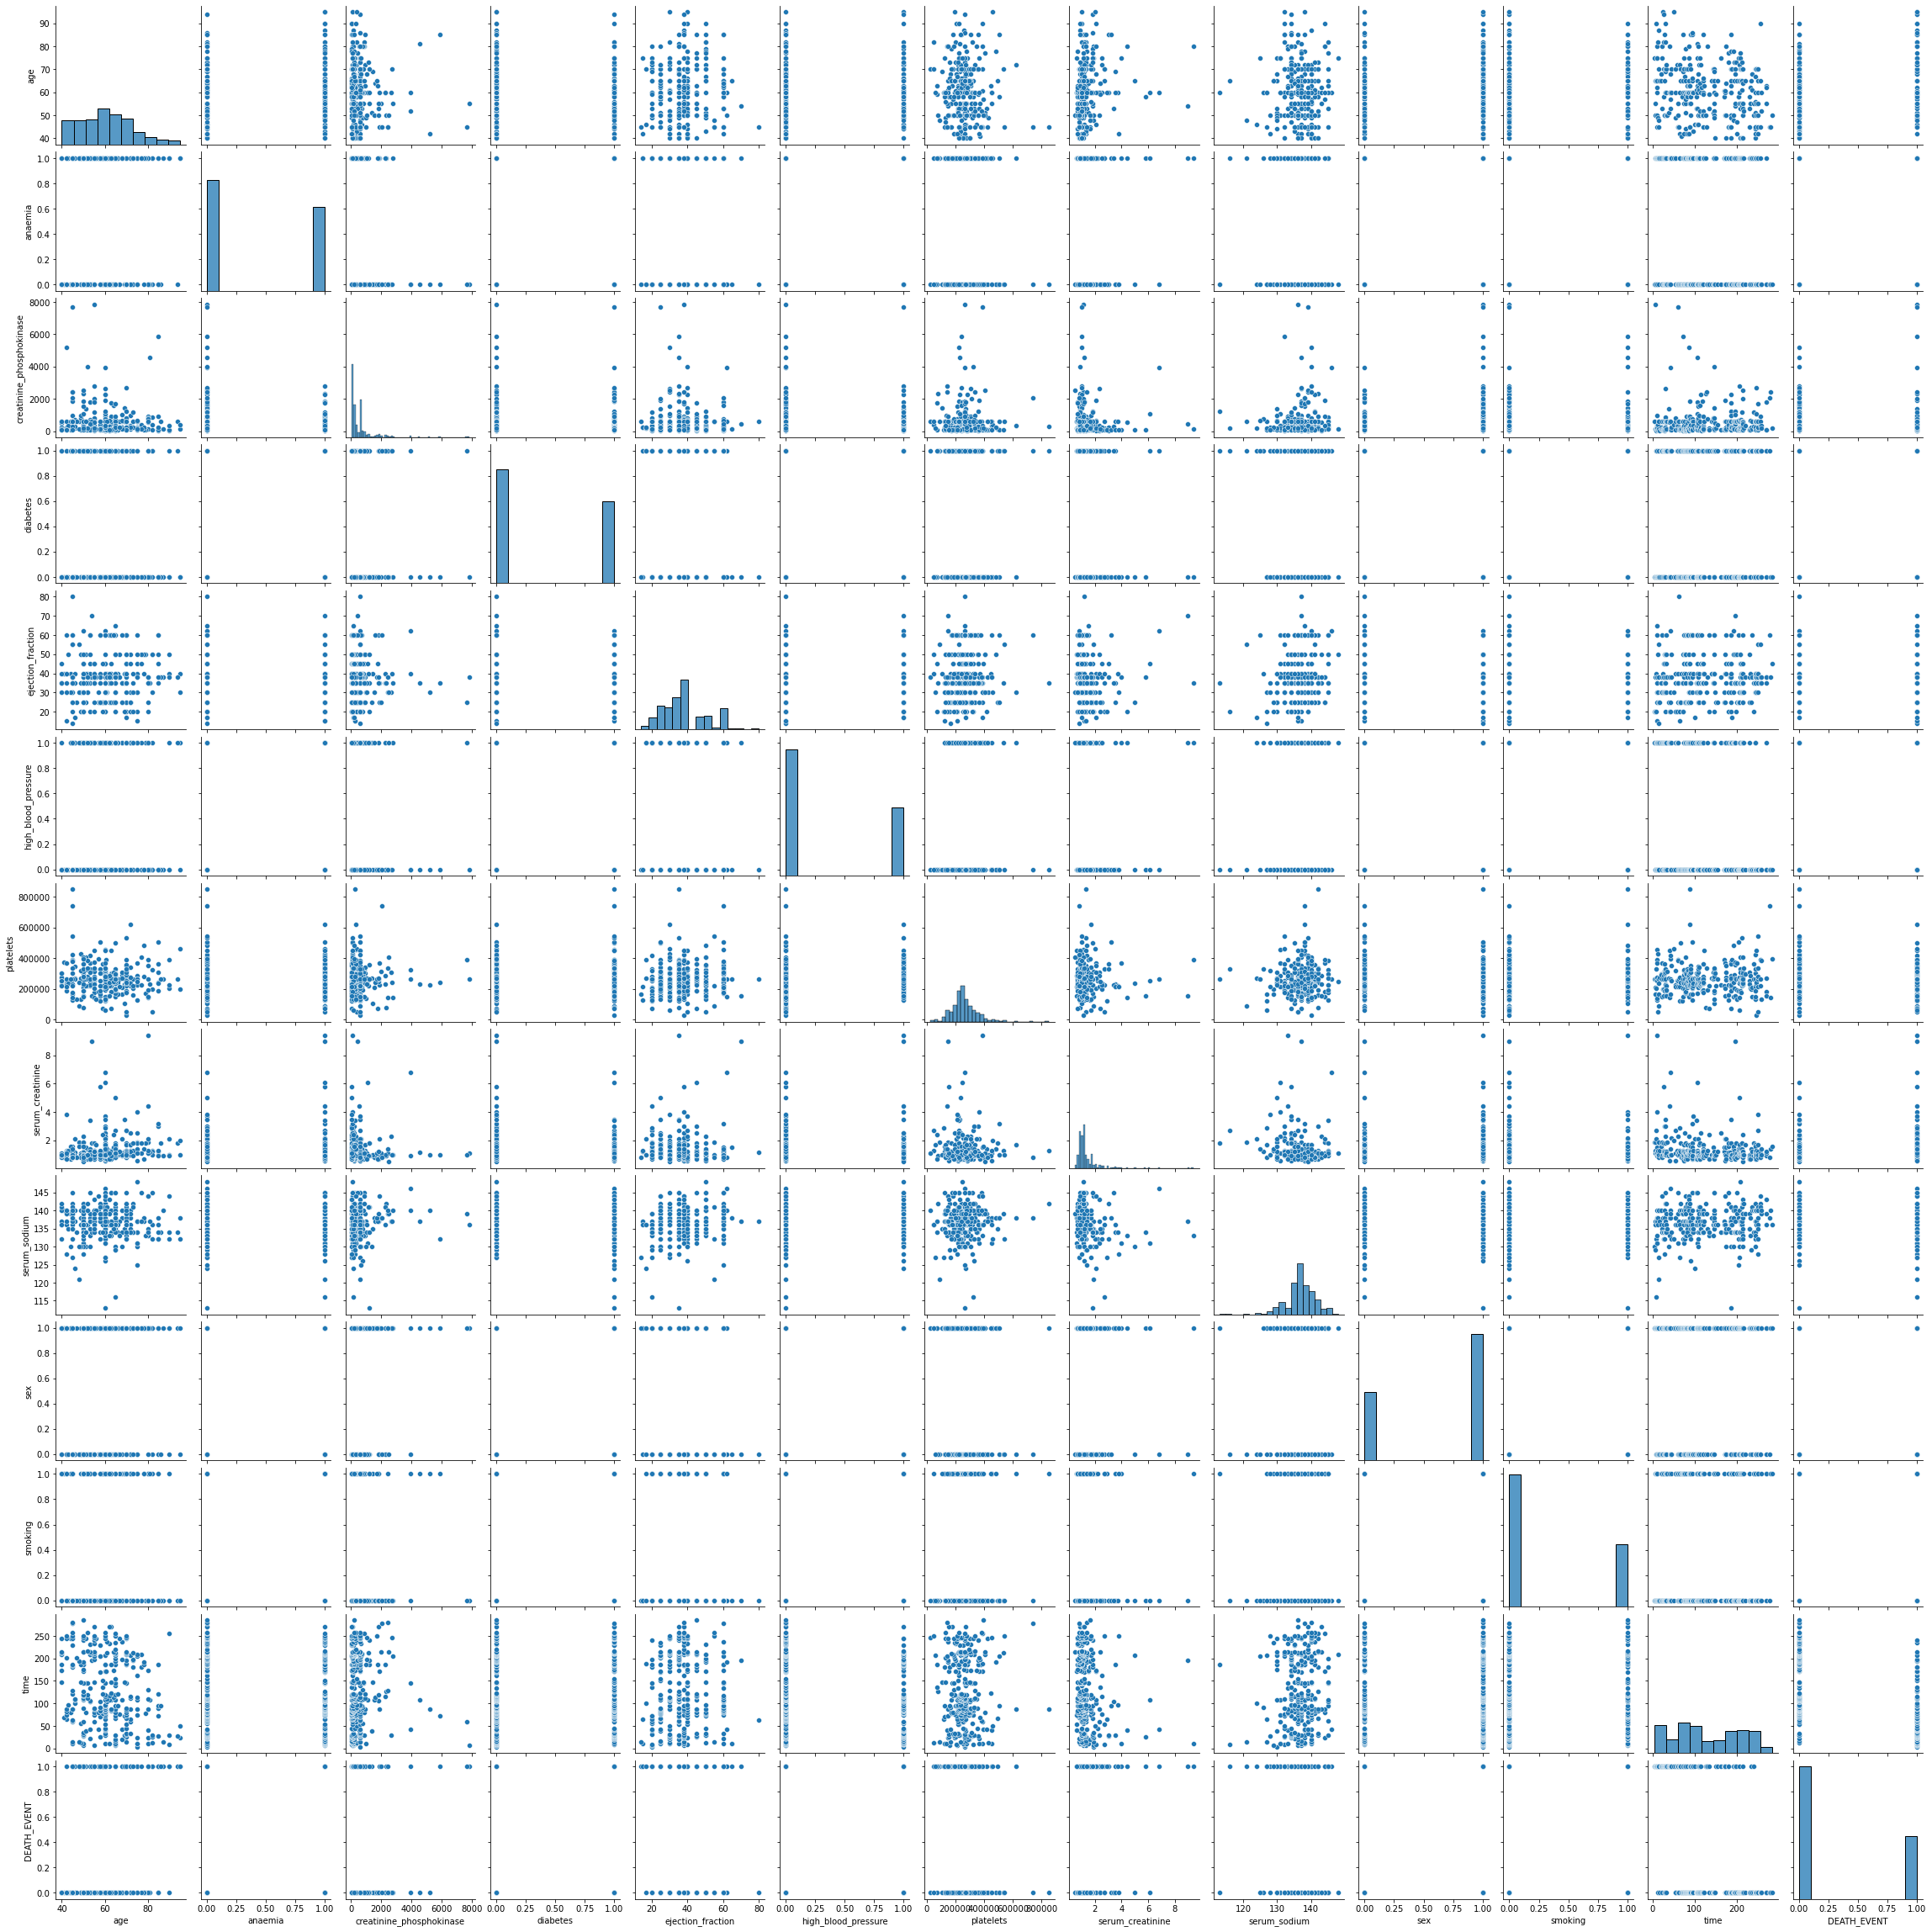

In [21]:
import seaborn as sns
sns.pairplot(df)

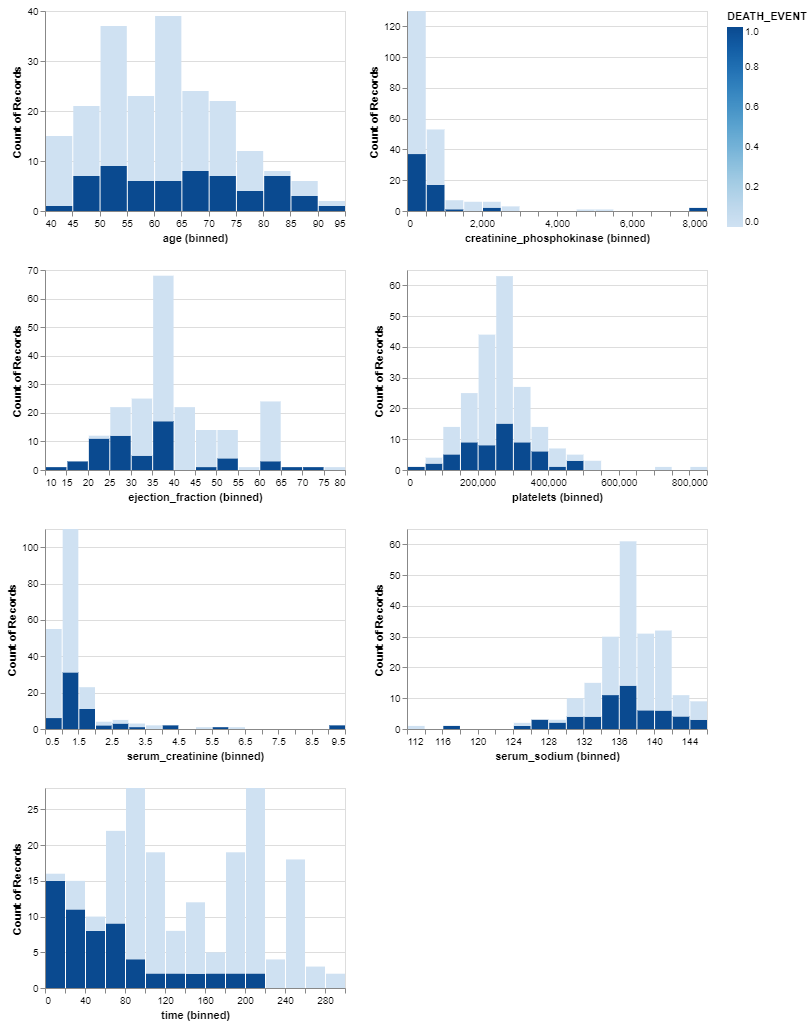

In [22]:
numeric_cols=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']
plot = alt.Chart(train_df).mark_bar().encode(
     alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=20)),
     alt.Y("count()"),
     color ='DEATH_EVENT'
     ).properties(
    width=300,
    height=200).repeat(numeric_cols, columns = 2)

plot

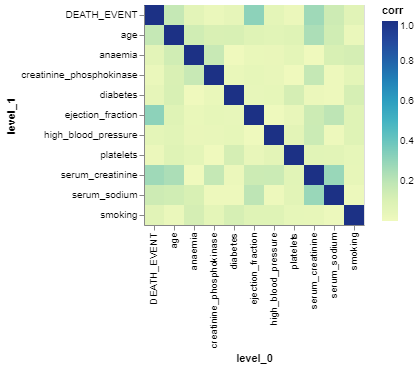

In [23]:
corr_df = (
    train_df.drop(['sex', 'time'], axis = 1)
    .corr('spearman')
    .abs()
    .stack()
    .reset_index(name='corr'))
alt.Chart(corr_df).mark_rect().encode(
    x='level_0',
    y='level_1',
    size='corr',
    color='corr')

<AxesSubplot:>

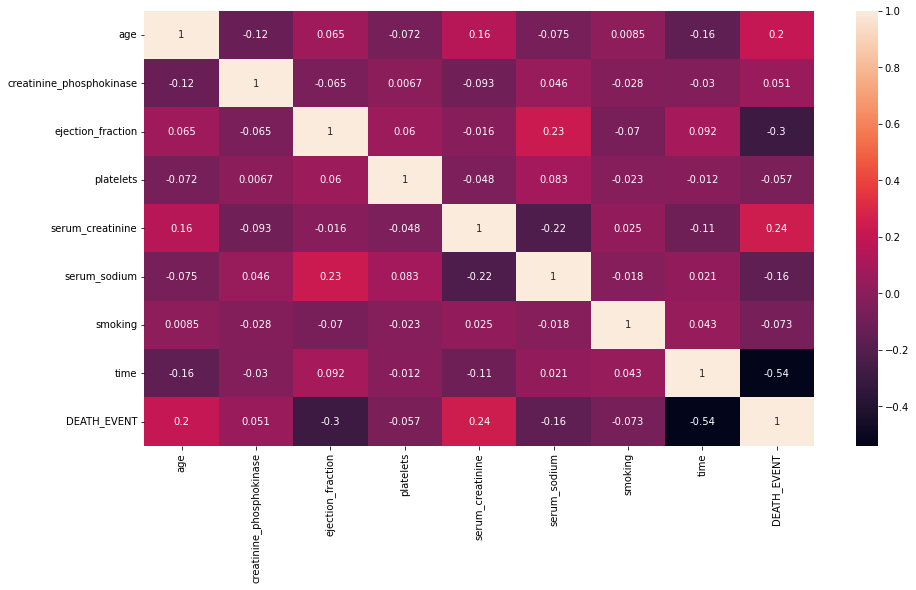

In [24]:
plt.figure(figsize = (15,8))
sns.heatmap(train_df.drop(['sex', 'diabetes', 'high_blood_pressure','anaemia'], axis =1).corr(), annot = True)

**Interpretation:**
1. Very negligible multicollinearity is present between the numeric variables in the given dataset.
2. We have dropped the binary variables since they may not contribute to multicollinearity

### Analysis of Binary variables:

In [25]:
binary_var = df[['sex', 'diabetes', 'high_blood_pressure','anaemia']]

#### 1. Relation of "SEX" variable with Death Event: 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

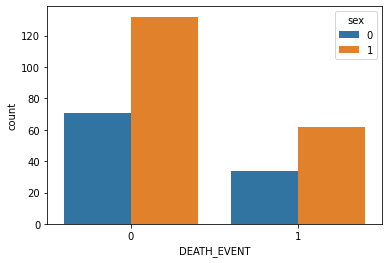

In [26]:
sns.countplot(x='DEATH_EVENT', hue = 'sex', data = df)

In [27]:
np.round(df.groupby('DEATH_EVENT')['sex'].value_counts(normalize = True)*100)

DEATH_EVENT  sex
0            1      65.0
             0      35.0
1            1      65.0
             0      35.0
Name: sex, dtype: float64

Almost same percentage of men and women have survived or faced death by heart failure.

### 2. Relation of "Diabetes" variable with Death Event: 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

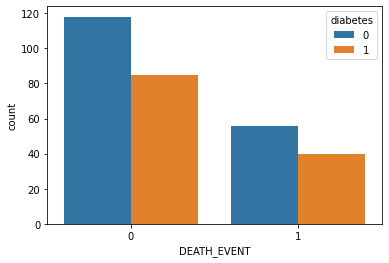

In [28]:
sns.countplot(x='DEATH_EVENT', hue = 'diabetes', data = df)

In [29]:
np.round(df.groupby('DEATH_EVENT')['diabetes'].value_counts(normalize = True)*100)

DEATH_EVENT  diabetes
0            0           58.0
             1           42.0
1            0           58.0
             1           42.0
Name: diabetes, dtype: float64

Heart Failure rate recorded is similar in diabetic as well as non-diabetic patients.

### 3. Relation of "Anaemia" variable with Death Event: 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

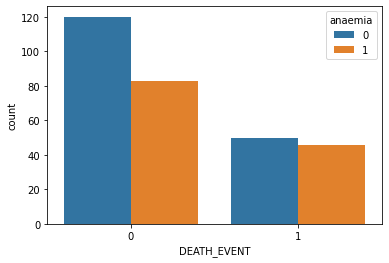

In [30]:
sns.countplot(x='DEATH_EVENT', hue = 'anaemia', data = df)

In [31]:
np.round(df.groupby('DEATH_EVENT')['anaemia'].value_counts(normalize = True)*100)

DEATH_EVENT  anaemia
0            0          59.0
             1          41.0
1            0          52.0
             1          48.0
Name: anaemia, dtype: float64

The Death Rate is almost similar for anaemic and non-anaemic patients. However, possibility of survival is slightly higher in non-anaemic patients than in anaemic patients.

### 4. Relation of "High Blood Pressure" variable with Death Event: 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

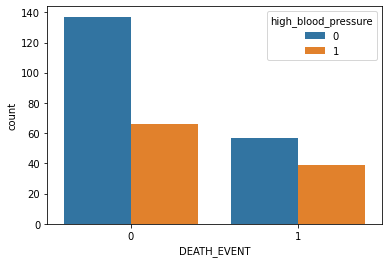

In [32]:
sns.countplot(x='DEATH_EVENT', hue = 'high_blood_pressure', data = df)

In [33]:
np.round(df.groupby('high_blood_pressure')['DEATH_EVENT'].value_counts(normalize = True)*100)

high_blood_pressure  DEATH_EVENT
0                    0              71.0
                     1              29.0
1                    0              63.0
                     1              37.0
Name: DEATH_EVENT, dtype: float64

The death percentage by heart failure is more in individuals with high blood pressure. Stil, there is a huge difference between those who have survived and encountered death despite having high blood pressure.

### 5. Relation of "Smoking" variable with Death Event: 

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

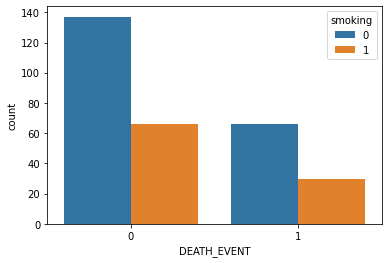

In [34]:
sns.countplot(x='DEATH_EVENT', hue = 'smoking', data = df)

In [35]:
np.round(df.groupby('smoking')['DEATH_EVENT'].value_counts(normalize = True)*100)

smoking  DEATH_EVENT
0        0              67.0
         1              33.0
1        0              69.0
         1              31.0
Name: DEATH_EVENT, dtype: float64

Similar percentage of smokers and non-smokers have faced death due to heart failure.

### Analysis of Numeric variables:

In [36]:
numeric_var = df[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

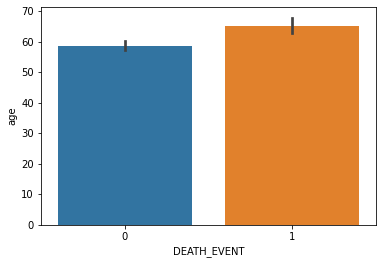

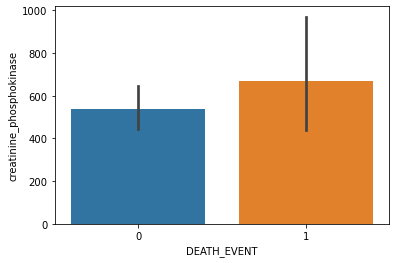

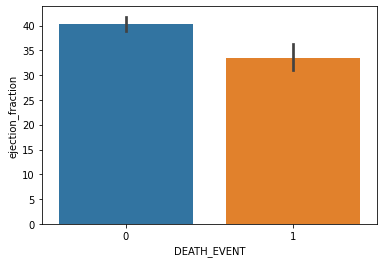

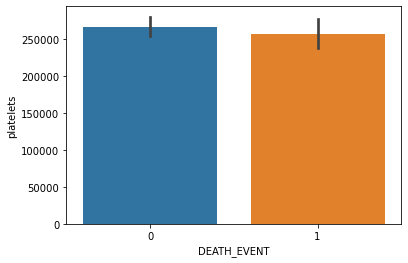

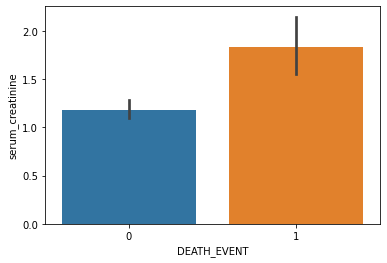

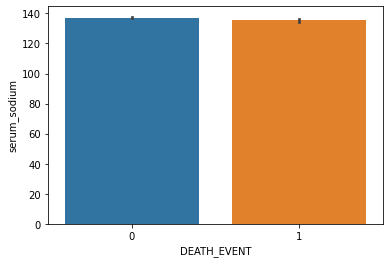

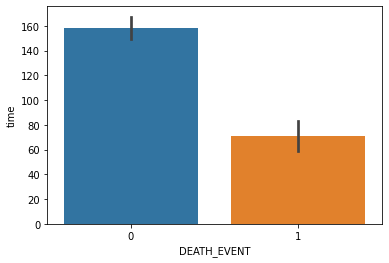

In [37]:
for c in numeric_var.columns:
    sns.barplot(x='DEATH_EVENT', y=c, data=df)
    plt.show()

**Observation**
  Even if all the features are numeric, it is difficult to do the comparison among them.
  From the above plots we can see that the features are in different scales,thus we are unable to interpret about     the feature causing the most effect to death.
  We'll need to process the training data and transform the numeric features to the same scale. 